In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import networkx as nx
import os
import pandas as pd
import time
import json

In [392]:
phdau = "/Users/ninawiedemann/Desktop/Projects/covid19_pocus_ultrasound.nosync/data/git_issues/"
for f in os.listdir(phdau):
    
    if "manif" in f: # f[-3:]=="png":
        # print(f)
        img = plt.imread(phdau+f)
        print(img.shape[0],"x",img.shape[1])

573 x 573
509 x 609
344 x 344


In [4]:
path = "../outputs"
f = "path_21946_infos.json"

In [17]:
with open(os.path.join(path,f),"r") as infile:
    infos = json.load(infile)

[4, 80]
[ 0.71646506  0.2549266  26.1549266  22.47044384]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}
[2, 50]
[ 0.69723429  0.2549266  22.9649266  19.35837487]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}
[1, 0]
[ 0.63954198  0.2549266  21.1449266  17.99630591]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}


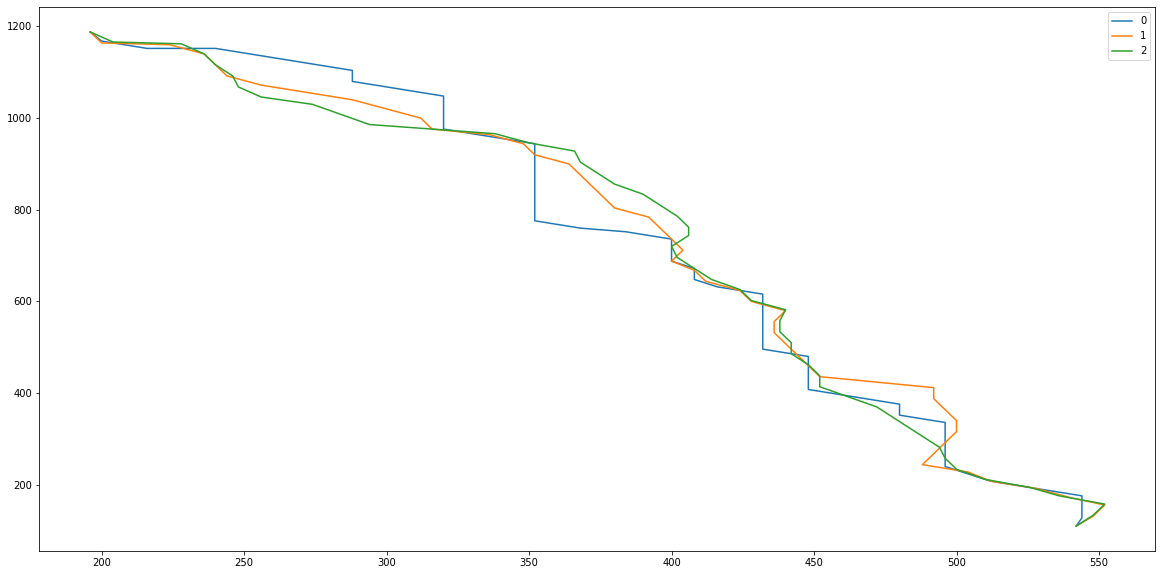

In [22]:
plt.figure(figsize=(20,10))
for i in range(len(infos["pipeline"])):
    print(infos["pipeline"][i])
    costs = np.array(infos["data"][i]["edgecosts"])
    path = np.array(infos["data"][i]["path_cells"])
    plt.plot(path[:,0], path[:,1], label=i)
    print(np.sum(costs, axis=0))
    print(infos["data"][i]["time_logs"])
plt.legend()
plt.show()

In [2]:
path = "../outputs"

In [27]:
times = pd.read_csv(os.path.join(path, "watershed_comp/time_tests.csv")) # "time_tests_compare1.csv"))

## Scale 2 comparison

In [18]:
direct = times[times["id"].str.contains("direct")]

In [19]:
overall_times = times[times["time_pipeline"]!=0]

In [8]:
# out_costs = np.array([eval(c) for c in times["cost_sum"]])

In [9]:
times.columns

Index(['id', 'scale', 'graphtype', 'pipeline', 'n_nodes', 'n_edges',
       'add_nodes_time', 'add_edge_time', 'shortest_path_time', 'sp_tree_time',
       'ksp_time', 'pareto_time', 'downsample_time', 'cult_costs', 'hum_costs',
       'plan_costs', 'tech_costs', 'cost_sum', 'time_pipeline'],
      dtype='object')

In [30]:
agg_dict = {"n_edges":"max", "add_edge_time":"sum", "shortest_path_time":"sum","downsample_time":"sum", "cost_sum":"min", "time_pipeline":"max"}
#  "pareto_time":"sum", "ksp_time":"sum", "sp_tree_time":"sum",
max_edges = times.groupby("id").agg(agg_dict).reset_index()

In [32]:
# times.groupby('id')['dist'].apply(list)
max_edges["cost_sum"] = list(times.groupby('id')['cost_sum'].apply(list))
# max_edges["factos"] = list(times.groupby('id')['sample_factor'].apply(list))

In [35]:
4280*5656

24207680

In [36]:
1300 * 2500

3250000

In [33]:
max_edges

,id,n_edges,add_edge_time,shortest_path_time,downsample_time,cost_sum,time_pipeline
0,2-100-max,96237808,145.023,103.605,5.687,"[7.302045490842018, 6.56529672236911]",339.687
1,2-100-max-watershed,96926596,146.391,99.079,315.066,"[7.047956820891278, 6.56529672236911]",644.073
2,2-100-mean,97054407,154.193,104.702,7.411,"[7.187759776556303, 6.56529672236911]",356.233
3,2-100-mean-watershed,96926596,151.603,102.710,339.554,"[7.047956820891278, 6.56529672236911]",681.858
4,2-100-min,96518677,148.182,105.222,6.281,"[7.591602141088321, 6.56529672236911]",350.998
5,2-100-min-watershed,96926596,147.079,99.575,330.422,"[7.047956820891278, 6.56529672236911]",661.965
6,4-100-mean,98546071,112.830,72.964,1.732,"[7.819794638246336, 6.56529672236911]",234.942
7,4-100-mean-watershed,97285353,113.496,70.916,80.785,"[7.707956820891278, 6.56529672236911]",309.964


In [22]:
df_plot = times[["id", "cost_sum", ]]

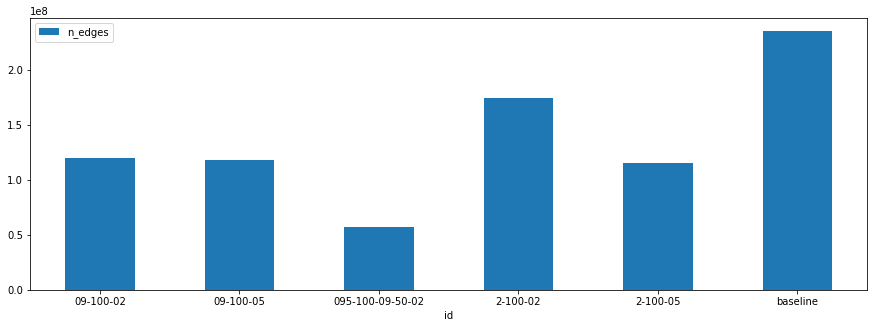

In [23]:
ax = max_edges.plot.bar(x='id', y='n_edges', rot=0, figsize=(15,5))


## Bar plot of costs

In [24]:
def plot_comparison(var):
    costs = times.groupby('id')[var].apply(list)
    co = np.array(costs)
    max_len = max([len(c) for c in co])
    new_list = [l + [l[-1] for _ in range(max_len-len(l))] for l in co]
    new_df = pd.DataFrame(data = new_list, columns=[str(i) for i in range(max_len)])
    new_df["id"] = np.unique(times["id"])
    ax = new_df.plot.bar(x='id', figsize=(15,5))

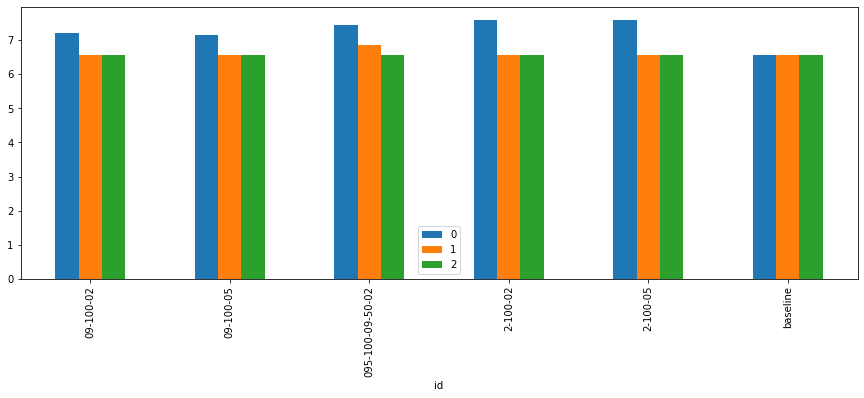

In [25]:
plot_comparison("cost_sum")

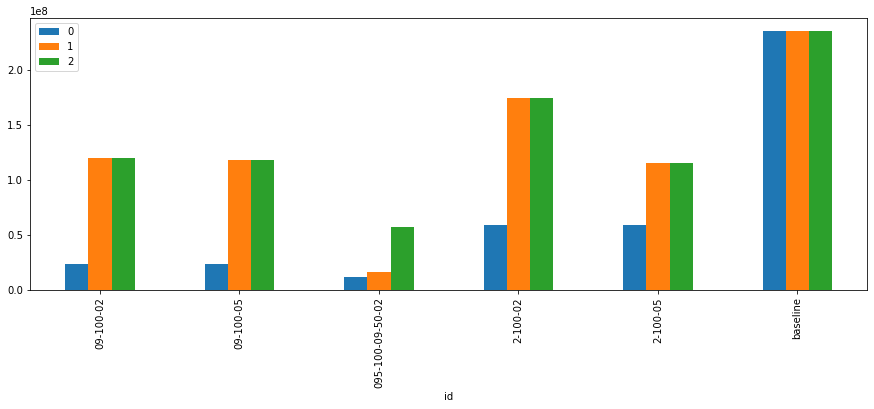

In [26]:
plot_comparison("n_edges")

## Check outputs qualitatively:

In [ ]:
instance_path = "/Users/ninawiedemann/Downloads/tifs_new/data_dump_1.dat"
with open(instance_path, "rb") as infile:
    data = pickle.load(infile)
(instance, instance_corr, start_inds, dest_inds) = data.data

In [ ]:
paths = []
for json_file in ["path_norm-1-direct_infos.json", "path_norm_1_pipe_infos.json", "path_random_1_pipe_infos.json"]:
    with open("../outputs/"+json_file, "r") as infile:
        infos = json.load(infile)
        print(json_file)
        costs = infos["data"][-1]["edgecosts"]
        print(np.sum(np.array(costs), axis=0), np.sum(np.array(costs)))
        paths.append(np.array(infos["data"][-1]["path_cells"]))

### Double check costs

In [ ]:
for i, path in enumerate(paths):
    costs = []
    for p in path:
        cost = instance[:, p[0], p[1]]
        costs.append(cost)
    print(np.sum(np.array(costs), axis=0))

### Color paths in image

In [ ]:
expanded = np.expand_dims(instance_corr*instance[2], axis=2)
expanded = np.tile(expanded, (1, 1, 3)) 
buffer = 2
for i, path in enumerate(paths[:3]):
    col = np.zeros(3)
    col[i] = 1
    for p in path:
        x = p[0]
        y = p[1]
        expanded[x - buffer:x + buffer + 1,
                 y - buffer:y + buffer + 1]  = col

In [ ]:
red = normal

green = norm pipe

blue = random pipe

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(np.swapaxes(expanded, 1, 0))

### Time tests

In [ ]:
# min and argmin at same time
def original_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.amin(A,axis=0)
    return min_idx, min_val

def proposed_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.take_along_axis(A, min_idx[None,:,:], axis=0)[0,:,:]
    return min_idx, min_val


A = np.random.randint(0,99,(40,400,500))
%timeit original_app(A)
%timeit proposed_app(A)

## Check average distance on out path

2
23.44796037531516 min: 16.1245154965971
2
23.88907334236418 min: 16.492422502470642


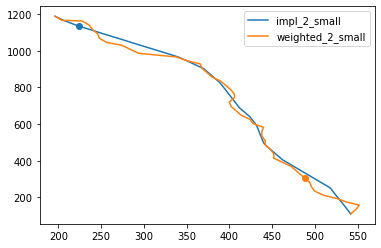

In [19]:
path_in = "../../outputs"
found_paths = []
for f in ["impl_2_small", "weighted_2_small"]:
    with open(os.path.join(path_in,f+"_infos.json"),"r") as infile:
        infos = json.load(infile)
    # print(infos["data"][0]["path_cells"])
    print(infos["scale"])
    found_paths.append(infos["data"][0]["path_cells"])
    # get path
    path = np.asarray(infos["data"][0]["path_cells"])
    # plot
    plt.plot(path[:,0], path[:,1], label=f)
    # get dists
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    print(np.mean(dists), "min:", np.min(dists))
    a = np.where(np.array(dists)<17)
    plt.scatter(path[a,0], path[a,1])
plt.legend()
plt.show()

In [ ]:
for path in found_paths:
    path = np.asarray(path)
    # plt.plot(path[:,0], path[:,1])
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    # print(dists)
    print("smaller 17:", np.where(np.array(dists)<17))
    plt.hist(dists)
    plt.show()

# Evaluate non-normalized costs

In [2]:
import os
import pickle
import rasterio
from power_planner.utils.utils import normalize, bresenham_line, discrete_angle_costs, angle
from power_planner.utils.utils_costs import CostUtils
from power_planner.utils.utils_constraints import ConstraintUtils

In [3]:
layer_path = "/Users/ninawiedemann/Desktop/thesis/data/belgium.nosync/tif_layers"
csv_path = "/Users/ninawiedemann/Desktop/thesis/data/belgium.nosync/layer_weights.csv"
json_path = "/Users/ninawiedemann/Desktop/thesis/outputs/paths_compare"

In [4]:
def get_raw_data(layer_path, csv_path, scenario=1):
    layer_list = pd.read_csv(csv_path).dropna()
    # layer_list = layer_csv[layer_csv["weight_" + str(scenario)] != "Forbidden"]
    cost_classes = np.unique(layer_list["class"])
    layer_arr = []
    layer_weights, layer_names, layer_classes = [], [], []
    forb_arr = []
    for i, row in layer_list.iterrows():
        file_path = os.path.join(
            layer_path, row["Layer Name"] + ".tif"
        )
        if os.path.exists(file_path):
            with rasterio.open(file_path, 'r') as ds:
                arr = ds.read()[0]
            # binarize single tif layer so it can be weighted
            # -1  because in tifs the costly areas are black
            
            # add to hard constraints or general instance
            if row["weight_" + str(scenario)]=="Forbidden":
                constraint = arr.astype(int) > 0.5 * np.max(arr)
                forb_arr.append(constraint)
                print(constraint.shape)
            else:
                costs = np.absolute(normalize(arr) - 1)
                layer_arr.append(costs)
                layer_weights.append(row["weight_" + str(scenario)])
                layer_classes.append(row["class"])
                layer_names.append(row["Corresponding Name"])
        else:
            print("file not found:", row["Layer Name"])
    df = pd.DataFrame()
    df["weights"] = layer_weights
    df["arr_inds"] = [i for i in range(len(layer_arr))]
    df["class"] = layer_classes
    df["layer"] = layer_names
    return np.swapaxes(np.array(layer_arr),2,1), np.swapaxes(np.array(forb_arr), 2,1), df

### Display hard constraints

In [5]:
def display_paths(forbidden_arr, paths):
    plt.figure(figsize=(20,10))
    plt.imshow(np.all(forbidden_arr.astype(int), axis=0), cmap=plt.get_cmap("gist_gray"))
    plt.colorbar()
    for path in paths:
        plt.scatter(path[:,1], path[:,0])
    plt.show()

#### Check if forbidden layers used

In [6]:
def assert_forbidden(forbidden_arr, paths):
    for l,f in enumerate(forbidden_arr):
        for (i,j) in path:
            assert f[i,j] >0, f"forbidden: layer {l} cell {i} {j}"

def assert_forbidden_inst(forbidden_arr, path):
    for (i,j) in path:
        assert forbidden_arr[i,j] >0, f"forbidden: cell {i} {j}"

### Compute absolute costs

#### Vertex costs

In [7]:
def pylon_costs(layer_arr, path):
    pylons = []
    for l in range(len(layer_arr)):
        pylons.append(np.sum([layer_arr[l,i,j] for (i,j) in path]))
    return pylons

#### Cable costs

In [8]:
def cable_costs(layer_arr, path):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # edge costs
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            path_edges.extend(line[1:-1])
        edge_costs.append(np.sum([layer_arr[l,i,j] for (i,j) in path_edges]))
    return edge_costs

def edge_costs(layer_arr, path):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # get connection line between two paths
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            # take the mean of each segment
            path_edges.append(np.mean([layer_arr[l,i,j] for (i,j) in line[1:-1]]))
        edge_costs.append(np.sum(path_edges))
    return edge_costs

#### Angle costs

In [9]:
# angle costs
def angle_costs(path):
    angle_costs = []
    for p in range(len(path)-2):
        vec1 = path[p + 1] - path[p]
        vec2 = path[p + 2] - path[p + 1]
        angle_costs.append(angle(vec1, vec2))
    sum_angle = np.sum(angle_costs)
    return round(sum_angle, 2)

### Normalized costs

In [10]:
from power_planner.utils.utils import normalize

In [12]:
normed_per_class = []
for class_name, df_grouped in df.groupby(["class"]):
    layer_inds = df_grouped["arr_inds"].astype(int)
    relevant_layers = arr[layer_inds]
    group_weights = df_grouped["weights"].values.astype("float")
    weighted_layers = np.sum(np.array([relevant_layers[i] * group_weights[i] for i in range(len(group_weights))]), axis=0)
    normed_per_class.append(normalize(weighted_layers))
normed_per_class = np.asarray(normed_per_class)


In [13]:
with open("../data/belgium_dump_1.dat", "rb") as infile:
    data = pickle.load(infile)
    (instance, instance_corr, start_inds, dest_inds) = data.data

In [34]:
start_inds

array([542, 111])

In [15]:
instance.shape, normed_per_class.shape

((4, 739, 1300), (4, 1511, 1313))

### Script to create dataframe

In [11]:
arr, forb, df = get_raw_data(layer_path, csv_path)

/Users/ninawiedemann/miniconda3/envs/penv/lib/python3.8/site-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1313, 1511)
file not found: REN_URB
(1313, 1511)
(1313, 1511)
(1313, 1511)
(1313, 1511)
file not found: PAC
(1313, 1511)
(1313, 1511)
file not found: SparseVeg
file not found: PDS_Revisions_INFRA
file not found: PDS_RISQUES
file not found: EquipAxe
file not found: RisqueEbouVersant
file not found: CyclingWays
(1313, 1511)


In [ ]:
# read in ksp from one file
with open(os.path.join(json_path, "impl_lg_5_ksp_orig.json"), "r") as infile:
    b_path = json.load(infile)
path_list = [np.asarray(p) for p in path_list]
json_names = ["ksp_"+str(i) for i in range(len(path_list))]

In [39]:
# read in several files
json_names = ["impl_0e_3a.json", "impl_2e_2a.json", "impl_3e_0a.json"]
# ["impl_lg.json", "normal.json",  "impl_5e_1a.json"] # "edge_cost_2_orig.json" - does not work because scale 2 -> forbidden areas (can still take it but will give assertion error)
path_list = []
for j_name in json_names:
    with open(os.path.join(json_path, j_name), "r") as infile:
        path_list.append(np.array(json.load(infile)[0]))
print(f"loaded {len(path_list)} paths")

loaded 3 paths


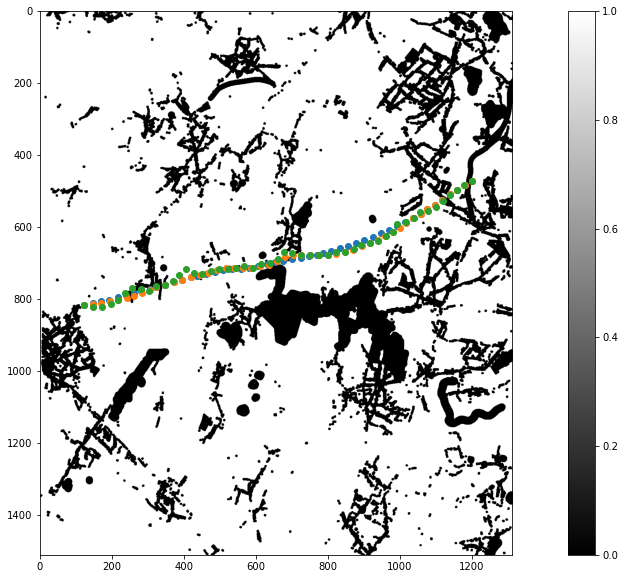

In [40]:
display_paths(forb, path_list)

In [41]:
for path in path_list:
    assert_forbidden(forb, path)
    # path2 = np.array(path)-shift_to_origin
    # assert_forbidden_inst(instance_corr, path2)

In [42]:
results_df = df.copy()
angle_dict = {"weights":0,"arr_inds":"-", "class":"ANGLE", "layer":"Sum of angles (radial)"}
for name, path in zip(json_names,path_list):
    results_df[(name.split(".")[0], "pylon_cost")] = pylon_costs(arr, path)
    results_df[(name.split(".")[0], "cable_costs")] = cable_costs(arr, path)
    results_df[(name.split(".")[0], "edge_costs")] = edge_costs(arr,path)
    angle_dict[(name.split(".")[0], "edge_costs")] = angle_costs(path)
    angle_dict[(name.split(".")[0], "cable_costs")] = angle_costs(path)
    angle_dict[(name.split(".")[0], "pylon_cost")] = angle_costs(path)
# add angles
print(angle_dict)
results_df.loc[-1] = angle_dict

{'weights': 0, 'arr_inds': '-', 'class': 'ANGLE', 'layer': 'Sum of angles (radial)', ('impl_0e_3a', 'edge_costs'): 1.08, ('impl_0e_3a', 'cable_costs'): 1.08, ('impl_0e_3a', 'pylon_cost'): 1.08, ('impl_2e_2a', 'edge_costs'): 2.69, ('impl_2e_2a', 'cable_costs'): 2.69, ('impl_2e_2a', 'pylon_cost'): 2.69, ('impl_3e_0a', 'edge_costs'): 14.98, ('impl_3e_0a', 'cable_costs'): 14.98, ('impl_3e_0a', 'pylon_cost'): 14.98}


In [43]:
results_df[(results_df[[("impl_0e_3a", "cable_costs"),("impl_2e_2a", "cable_costs"),("impl_3e_0a", "cable_costs")]].T != 0).any()].drop(columns=["arr_inds"])


,weights,class,layer,"(impl_0e_3a, pylon_cost)","(impl_0e_3a, cable_costs)","(impl_0e_3a, edge_costs)","(impl_2e_2a, pylon_cost)","(impl_2e_2a, cable_costs)","(impl_2e_2a, edge_costs)","(impl_3e_0a, pylon_cost)","(impl_3e_0a, cable_costs)","(impl_3e_0a, edge_costs)"
2,5,cultural,Heritage Sites,0.00,3.00,0.132411,0.00,0.00,0.000000,0.00,11.00,0.478261
7,2,planning,General Rules of Buildings in Rural Areas,0.00,11.00,0.500000,0.00,17.00,0.739130,1.00,29.00,1.260870
11,-5,technical,Modified Infrastructure Project,1.00,19.00,0.957219,1.00,19.00,0.822464,1.00,19.00,0.822464
12,-4,planning,Land Use - Linear Elements,18.00,133.00,6.109320,31.00,207.00,9.631379,35.00,192.00,8.977096
13,-4,planning,Land Use - Punctual Elements,1.00,3.00,0.134387,0.00,1.00,0.045455,1.00,0.00,0.000000
15,-5,planning,Cropland,40.00,843.00,39.041195,42.00,870.00,40.214471,44.00,886.00,41.480514
16,-5,planning,Grassland,8.00,121.00,5.580074,7.00,93.00,4.447958,8.00,103.00,4.975630
17,-5,planning,Mostly Crop with Vegetation,4.00,23.00,1.073975,3.00,60.00,2.750518,7.00,66.00,3.017523
18,-3,planning,Tree Cover,4.00,87.00,4.220611,3.00,67.00,3.295563,5.00,73.00,3.641538
19,2,cultural,Perimeters of scenic view,2.00,70.00,3.081028,2.00,68.00,3.022774,2.00,77.00,3.476285


In [44]:
class_df = pd.DataFrame()

weighted_pylon_costs, weighted_edge_costs = [], []
summed_pylon_costs, summed_edge_costs = [], [] 
class_df[("class", "", "")] = [c for (c,_) in results_df.groupby(["class"]) if c!="ANGLE"]
# iterate over columns
for j_name in json_names:
    name = j_name.split(".")[0]
    for cost in ["edge_costs", "pylon_cost", "cable_costs"]: 
        # consider groups
        weighted_results, abs_results = [], []
        for class_name, df_grouped in results_df.groupby(["class"]):
            if class_name=="ANGLE":
                continue
            # print(class_name, df_grouped["weights"])
            group_weights = np.array(df_grouped["weights"]).astype(int)
            normed_weights = group_weights/np.sum(group_weights)
            # print(normed_weights, class_name, df_grouped["weights"])
            w = normed_weights * np.array(df_grouped[(name, cost)].values)
            weighted_results.append(round(np.sum(w),3))
            abs_results.append(np.sum(df_grouped[(name, cost)].values))
        class_df[(name, cost, "absolute")] = abs_results
        class_df[(name, cost, "weighted")] = weighted_results
class_df.columns = pd.MultiIndex.from_tuples(class_df.columns)
class_df

class impl_0e_3a                                                     \
             edge_costs          pylon_cost          cable_costs             
               absolute weighted   absolute weighted    absolute  weighted   
0   cultural   3.302372    0.422        2.0    0.235        75.0     9.588   
1      human   0.000000    0.000        0.0    0.000         0.0     0.000   
2   planning  56.659563   24.101       75.0   31.636      1221.0   519.818   
3  technical  22.352235  -84.463       28.0 -140.000       481.0 -1836.000   

  impl_2e_2a                                                    impl_3e_0a  \
  edge_costs          pylon_cost          cable_costs           edge_costs   
    absolute weighted   absolute weighted    absolute  weighted   absolute   
0   3.066253    0.366        2.0    0.235        69.0     8.235   4.041502   
1   0.000000    0.000        0.0    0.000         0.0     0.000   0.000000   
2  61.124473   25.835       86.0   35.727      1315.0   555.818  63.353171   
3  23.773250  -98.446       27.0 -135.000       521.0 -2170.000  28.193341   

                                                      
           pylon_cost          cable_costs            
  weighted   absolute weighted    absolute  weighted  
0    0.570        2.0    0.235        90.0    12.765  
1    0.000        0.0    0.000         0.0     0.000  
2   26.516      101.0   41.091      1349.0   564.000  
3 -122.837       35.0 -175.000       602.0 -2631.000

In [45]:
for column in class_df.columns:
    if "class" in column or "absolute" in column:
        continue
    vals = class_df[column].values
    print(column, np.sum(vals*np.array([0.28571429, 0.35714286, 0.14285714, 0.21428571])))
# (['angle', 'cultural', 'human', 'planning', 'technical'],
# array([0.        , 0.28571429, 0.35714286, 0.14285714, 0.21428571]))

('impl_0e_3a', 'edge_costs', 'weighted') -14.535642562209999
('impl_0e_3a', 'pylon_cost', 'weighted') -25.41342806081
('impl_0e_3a', 'cable_costs', 'weighted') -316.42942214696
('impl_2e_2a', 'edge_costs', 'weighted') -17.30028536462
('impl_2e_2a', 'pylon_cost', 'weighted') -23.75757095107
('impl_2e_2a', 'cable_costs', 'weighted') -383.24456368132996
('impl_3e_0a', 'edge_costs', 'weighted') -22.37135668973
('impl_3e_0a', 'pylon_cost', 'weighted') -31.562713652109995
('impl_3e_0a', 'cable_costs', 'weighted') -479.56713313815004


## Plotting

In [46]:
cab_cost_cols = [(name.split(".")[0], "cable_costs") for name in json_names]

In [47]:
test_df = results_df.copy().set_index("layer")[cab_cost_cols]

In [48]:
test_weights = results_df.copy().set_index("layer")[(test_df.T != 0).any()]["weights"]
test_df = test_df[(test_df.T != 0).any()]

In [49]:
assert len(test_weights)==len(test_df)

In [50]:
normed_weighted = (test_weights.values.astype(int) +5)/10
rgbs = [(n,1-n,0) for n in normed_weighted]

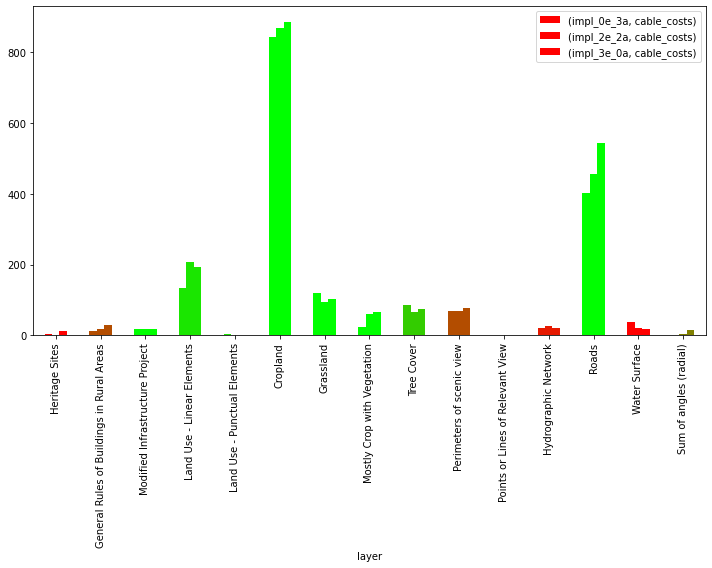

In [51]:
fig1, ax1 = plt.subplots(figsize=(10,8))
test_df.plot.bar(ax = ax1, rot=90, color=[rgbs, rgbs])
plt.gcf().subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.savefig("../../figure/abs_cost_plot.png")

In [ ]:
labels = results_df["layer"]
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## QGIS preparation

In [471]:
SCALE_PARAM = 1
IOPATH = "../../data/belgium.nosync/data_dump_orig_" + str(SCALE_PARAM) + ".dat"
with open(IOPATH, "rb") as infile:
    data = pickle.load(infile)

In [475]:
for name, path in zip(json_names, path_list):
    coordinates = [data.transform_matrix * p for p in path]
    df = pd.DataFrame(np.asarray(coordinates), columns=["X", "Y"])
    out_path = os.path.join(json_path, name.split(".")[0])
    df.to_csv(out_path + "_coords.csv", index=False)

## Pylon - layer matrix

In [28]:
# first compute coordinates of pylons and cables
def path_to_edge_coords(path):
    is_pylon = []
    path_coords = []
    for p in range(len(path)-1):
        # add current pylon
        path_coords.append(path[p])
        is_pylon.append(1)
        # add cable
        line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )[1:-1]
        for l in line:
            path_coords.append(l)
            is_pylon.append(0)
    path_coords.append(path[-1])
    is_pylon.append(1)
    return path_coords, is_pylon
# plt.plot(np.array(path_coords)[:,0], np.array(path_coords)[:,1])

def pathline_to_matrix(arr, path_coords, is_pylon):
    out_matrix = np.zeros((len(arr),len(is_pylon)))
    is_pylon_helper = np.array(is_pylon)+1
    for i in range(len(arr)):
        count = 0
        for (m,n), is_py in zip(path_coords, is_pylon_helper):
            out_matrix[i,count] = arr[i, m,n] * is_py # +1 if pylon
            count+=1
    return out_matrix

def pylon_cable_matrix(arr, path):
    path_coords, is_pylon = path_to_edge_coords(path)
    return pathline_to_matrix(arr, path_coords, is_pylon)
    
def pylon_edge_matrix(arr, path):
    out_matrix = np.zeros((len(arr), 2*len(path)-1))
    for i in range(len(arr)):
        for p in range(len(path)-1):
            # add current pylon
            (x,y) = path[p]
            out_matrix[i,p*2] = arr[i,x,y] * 2 # other value for pylon than for cable       
            # add cable
            line = bresenham_line(
                        path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                    )[1:-1]
            out_matrix[i, p*2+1] = np.any([arr[i,x,y] for (x,y) in line])
    return out_matrix

def pylon_matrix(arr, path):
    out_matrix = np.zeros((len(arr),len(path)))
    for i in range(len(arr)):
        for j, (m,k) in enumerate(path):
            out_matrix[i,j] = arr[i, m,k]
    return out_matrix

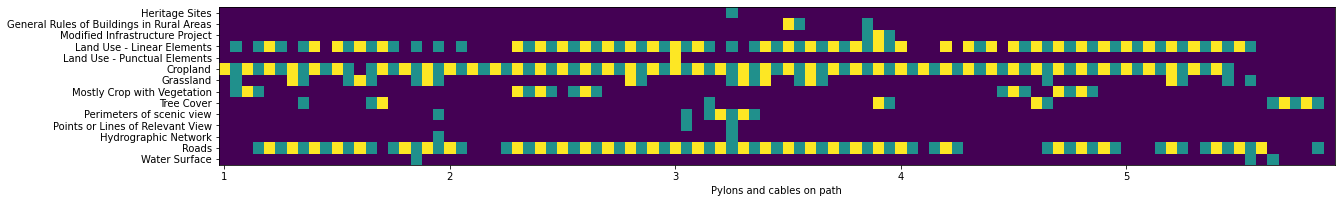

In [36]:
# OPTION 1: pylons and edges both as one field
out_matrix = pylon_edge_matrix(arr, path)
# OPTION 2: all fields of cables seperately
# out_matrix = pylon_cable_matrix(arr, path)
# OPTION 3: simply take pylons, no cables considered
# out_matrix = pylon_matrix(arr, path)

# restrict to nonzero:
layer_labels = df["layer"].values[np.any(out_matrix, axis=1)]
out_matrix = out_matrix[np.any(out_matrix, axis=1)]

# PLOTTING
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(out_matrix)
ax.set_xticklabels([i for i in range(len(out_matrix[0]))])
ax.set_yticklabels(layer_labels)
# plt.xticks([i for i in range(len(is_pylon))])
plt.yticks([i for i in range(len(out_matrix))])
plt.xlabel("Pylons and cables on path")
# ax.set_aspect(aspect=10)
plt.show()

## Test edge cost comutation

because of edge_inst?

In [60]:
def edge_costs(layer_arr, path, normed=False):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # get connection line between two paths
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            # take the mean of each segment
            path_edges.append(np.mean([layer_arr[l,i,j] for (i,j) in line[1:-1]]))
        edge_costs.append(np.sum(path_edges))
    print(edge_costs)
    return edge_costs

def compute_edge_costs(path, instance, class_weights):
    costs = []
    for p in range(len(path) - 1):
        point_list = bresenham_line(
            path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
        )
        costs.append(np.mean([np.sum(instance[:, i, j]*class_weights) for (i, j) in point_list[1:-1]]))
    return np.sum(costs)

In [50]:
from power_planner.utils.utils_costs import CostUtils

In [64]:
edge_inst = instance.copy()
edge_inst[:, instance_corr==0] = 1

In [67]:
class_weights = np.array([0.28571429, 0.35714286, 0.14285714, 0.21428571])
for name, path in zip(json_names, path_list):
    shifted_path = np.asarray(path) - shift_to_origin
    out = compute_edge_costs(shifted_path, edge_inst, class_weights)
    print(name, out)
    # out2 = edge_costs(instance, shifted_path)
    # print(np.sum(out* class_weights), np.sum(out2*class_weights))

impl_0e_3a.json 11.791903827345422
impl_2e_2a.json 9.635710067137667
impl_3e_0a.json 9.403328948897446


In [35]:
shift_to_origin = data.orig_start - start_inds 
normed_df = class_df.copy()
for name, path in zip(json_names,path_list):
    normed_df[(name.split(".")[0], "pylon_cost", "weighted")] = pylon_costs(instance, np.asarray(path) - shift_to_origin)
    normed_df[(name.split(".")[0], "cable_costs", "weighted")] = cable_costs(instance, np.asarray(path) - shift_to_origin)
    normed_df[(name.split(".")[0], "edge_costs", "weighted")] = edge_costs(instance, np.asarray(path) - shift_to_origin)
normed_df

class impl_0e_3a                                               \
             edge_costs            pylon_cost            cable_costs   
               absolute   weighted   absolute   weighted    absolute   
0   cultural   3.302372   0.552296        2.0   0.307692        75.0   
1      human   0.000000   0.000000        0.0   0.000000         0.0   
2   planning  56.659563  23.955485       75.0  21.360000      1221.0   
3  technical  22.352235  20.259899       28.0  18.827586       481.0   

              impl_2e_2a                                               \
              edge_costs            pylon_cost            cable_costs   
     weighted   absolute   weighted   absolute   weighted    absolute   
0   12.538462   4.191700   0.658255        3.0   0.461538        96.0   
1    0.000000   0.000000   0.000000        0.0   0.000000         0.0   
2  512.880000  53.626413  23.680036       78.0  20.080000      1182.0   
3  433.931034  16.285442  20.607938       24.0  19.655172       356.0   

              impl_3e_0a                                               \
              edge_costs            pylon_cost            cable_costs   
     weighted   absolute   weighted   absolute   weighted    absolute   
0   15.076923   4.306512   0.669866        3.0   0.461538        99.0   
1    0.000000   0.000000   0.000000        0.0   0.000000         0.0   
2  518.160000  65.650066  23.901265      105.0  17.760000      1409.0   
3  451.758621  24.736285  21.024836       33.0  18.931034       538.0   

               
               
     weighted  
0   15.384615  
1    0.000000  
2  518.240000  
3  455.206897

## backup

In [ ]:
weighted_edge_costs.append(np.sum(weighted_edges))
    summed_pylon_costs.append(np.sum(df_grouped["pylon_costs"].values))
    summed_edge_costs.append(np.sum(df_grouped["cable_costs"].values))
    c.append(class_name)
class_df = pd.DataFrame()
class_df["class"] = c
class_df["pylon_costs"] = summed_pylon_costs
class_df["weighted_pylon_costs"] = weighted_pylon_costs
class_df["cable_costs"] = summed_edge_costs
class_df["weighted_cable_costs"] = weighted_edge_costs
class_df

### Create tif layers for figure

In [68]:
from PIL import Image
figure_path = "/Users/ninawiedemann/Desktop/thesis/figure/layers"

In [82]:
together_arr = []
for i in range(len(arr)):
    print(df.loc[i]["class"])
    n,c = np.unique(arr[i], return_counts=True)
    if c[1]>100000:
        img = Image.fromarray(arr[i])
        m,n = arr[i].shape
        img = img.resize((m//10, n//10), resample=Image.BILINEAR)
        together_arr.append(np.array(img))
        img.save(os.path.join(figure_path, str(i)+".tif")) # df.loc[i]["class"]
        # plt.imshow(img)
        # plt.savefig(os.path.join(figure_path,df.loc[i]["class"], str(i)+".jpg"))

human
planning
cultural
planning
planning
planning
planning
planning
cultural
cultural
cultural
technical
planning
planning
cultural
planning
planning
planning
planning
cultural
cultural
technical
technical
technical
technical
technical
technical


In [83]:
together_arr = np.asarray(together_arr)

In [84]:
together_arr.shape

(8, 151, 131)

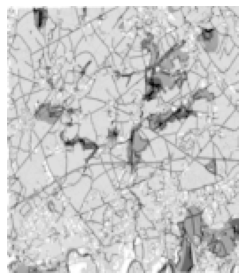

In [88]:
plt.imshow(np.sum(together_arr, axis=0), cmap='Greys')
plt.axis("off")
plt.tight_layout()
plt.savefig("together.png")

In [436]:
for (i,j) in [(-4,3),(-4,-5), (1,3)]:
    l1 = np.asarray(bresenham_line(i,j,0,0))
    l2 = np.asarray(bresenham_line(0,0,i,j))
    for l in range(len(l1)):
        print(l1[l]==l2[-l-1])

[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]


## Create spreadsheet for Gorilla

In [484]:
in_file = "/Users/ninawiedemann/Desktop/Projects/task_mentaleffortdiscounting_nback/nback_stimuli.json"

In [485]:
with open(in_file, "r") as infile:
    stimuli = json.load(infile)

In [486]:
stimuli

{'blocks_1back_practise1': 'tddgtwbcgtdtctbtwwwddbdwcbggdwcwcdggtcdggt',
 'blocks_1back_practise2': 'gdbctcwdtwgccdbbbdggbbdwcwgdgtcwbcctwtbbct',
 'blocks_1back_practise3': 'ddbwcgcdttwdgdbbgwcbtgcbdbbbdwtwbbggcgdtdg',
 'blocks_1back_resolved': 'tccbbbcwwbgtcgwcdgtbtgdbwwbdbgwwbggdgdcgwt',
 'blocks_2back_practise1': 'wbcgdbwbddcwdwbttgbwbwdbgwwdbtbgdwbtdbgbgw',
 'blocks_2back_practise2': 'dcctctgcbbdbdtdctwcggtbtwgccggdcdwbccwggdd',
 'blocks_2back_practise3': 'dwdddtwccgcbgwtwwgcbddwtgdtgcgbtdtwgwwbgwb',
 'blocks_2back_resolved': 'dggccbwttdbtwwcgcdcgtggcdcgcdcgcdtcgtddcbt',
 'blocks_3back_practise1': 'dcggbdcwdccdgtgbccgbtbgwbccwcwwtbtbdbwdttw',
 'blocks_3back_practise2': 'dwtctgctbgcdtdttcddbwwtbgctdcgtttwdtdgcdtc',
 'blocks_3back_practise3': 'wwdbwtbgtwcdbgcgwbwwdwwbdcbcdwbgctdtwgwttt',
 'blocks_3back_resolved': 'cdddcwbbbdcgtwwtdctwtcwgdcgdcwbgcbtgwwwtdg',
 'blocks_4back_practise1': 'bdwwdcdgwtwcgwgcbtdcbctwbtwbbtbctcddwbbbcb',
 'blocks_4back_practise2': 'bdwtwwwdggbwgwwwdcdggtwgbc

In [489]:
trial_list = []
stimuli_list = []
correct_list = []
for i in range(1,7):
    trial_list.append("Instructions"+str(i))
    stimuli_list.append("")
    correct_list.append("")
    fn = "blocks_"+str(i)+"back_practise1"
    current_stim = stimuli[fn]
    for j in range(len(current_stim)):
        trial_list.append("Trials")
        stimuli_list.append(current_stim[j])
        # print(stim)
        if j>=i and current_stim[j-i]==current_stim[j]:
            correct_list.append("Yes")
        else:
            correct_list.append("No")
    trial_list.append("Score")
    stimuli_list.append("")
    correct_list.append("")

In [492]:
import pandas as pd

In [501]:
df = pd.DataFrame()
df["display"] = trial_list
df["Letters"] = stimuli_list
df["Answer"] = correct_list

In [503]:
df.to_csv("/Users/ninawiedemann/Desktop/Projects/task_mentaleffortdiscounting_nback/stimuli_tables/first_round.csv", index=False)